In [1109]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.constants as sc
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '120825'

In [1110]:
k = np.linspace(0, 2*np.pi, 40)
#k = np.array([0, np.pi, np.pi*2])

In [1111]:
n

65

In [1112]:
n+=1
T=0
da=7
db=0
dc=da
na=0
nb=0
nc=na
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=2, UB=2, muB=0.2, mu=0.2, t=1, inhomp=True, inhomi=True)
alpha=0.7
#mM.DeltaN(k,T)
vals = mM.Deltra(k, T=T, HF=False, Nmax=120, Nmin=10, alpha=alpha)



In [1113]:
dels = vals[0]
nus = vals[2]

In [1114]:
vals[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.26465242, 0.25425834, 0.24160374, 0.22663163,
       0.20949207, 0.19063297, 0.17079183, 0.15087185, 0.13174447,
       0.1140717 , 0.09822671, 0.08431974, 0.07228012, 0.06194093,
       0.05310012, 0.04555545, 0.03912076, 0.03363158, 0.02894575,
       0.02494169, 0.0215161 , 0.01858154, 0.01606411, 0.01390146,
       0.01204098, 0.01043827, 0.0090558 , 0.00786187, 0.00682957,
       0.00593611, 0.00516207, 0.00449092, 0.00390854, 0.00340283,
       0.00296343, 0.00258145, 0.00224922, 0.00196014, 0.00170851])

In [1115]:
dels[:,-5:]

array([[0.38926329+0.j, 0.38828501+0.j, 0.38743425+0.j, 0.38669405+0.j,
        0.38604978+0.j],
       [0.07397952+0.j, 0.07360279+0.j, 0.07327835+0.j, 0.07299855+0.j,
        0.07275697+0.j],
       [0.38926329+0.j, 0.38828501+0.j, 0.38743425+0.j, 0.38669405+0.j,
        0.38604978+0.j]])

In [1116]:
np.concatenate((dels,vals[0][:,-1].reshape(3,1)), axis=1)[:,-5:]

array([[0.38828501+0.j, 0.38743425+0.j, 0.38669405+0.j, 0.38604978+0.j,
        0.38604978+0.j],
       [0.07360279+0.j, 0.07327835+0.j, 0.07299855+0.j, 0.07275697+0.j,
        0.07275697+0.j],
       [0.38828501+0.j, 0.38743425+0.j, 0.38669405+0.j, 0.38604978+0.j,
        0.38604978+0.j]])

In [1117]:
np.average(dels[:,-6:-1], axis=1)

array([0.38841308+0.j, 0.07365536+0.j, 0.38841308+0.j])

In [1118]:
np.average(dels[0,-5:])

(0.3875452787705193+0j)

In [1119]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [1120]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n Temperature={T}\n dels: {dels}\nnus: {nus}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


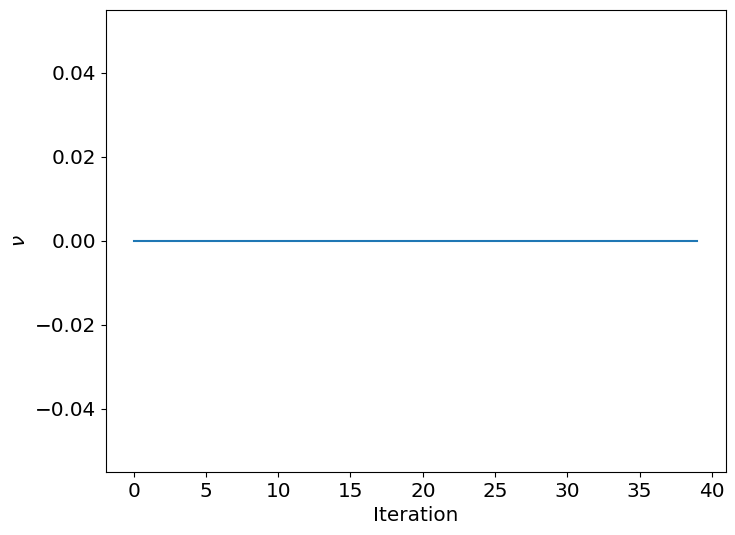

In [1121]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

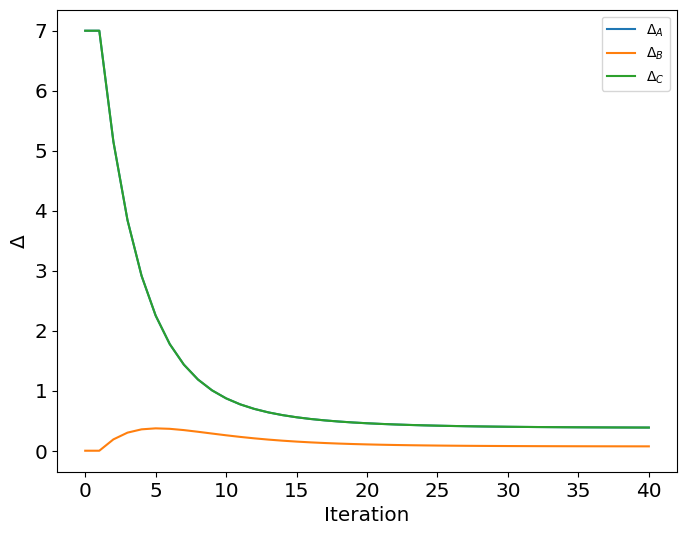

In [1122]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[0]), label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[1]), label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[2]), label = r'$\Delta_C$')

plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [1123]:
#da, db, dc = dels[:,-1]
#na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [1124]:
energies.T

array([[-3.04535984, -3.04535984, -2.61615169, ...,  2.61615169,
         3.04535984,  3.04535984],
       [-3.04464845, -3.04464845, -2.61544045, ...,  2.61544045,
         3.04464845,  3.04464845],
       [-3.04251606, -3.04251606, -2.61330853, ...,  2.61330853,
         3.04251606,  3.04251606],
       ...,
       [-3.03966942, -3.03966942, -2.61046251, ...,  2.61046251,
         3.03966942,  3.03966942],
       [-3.04393687, -3.04393687, -2.61472904, ...,  2.61472904,
         3.04393687,  3.04393687],
       [-3.04535984, -3.04535984, -2.61615169, ...,  2.61615169,
         3.04535984,  3.04535984]])

In [1125]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

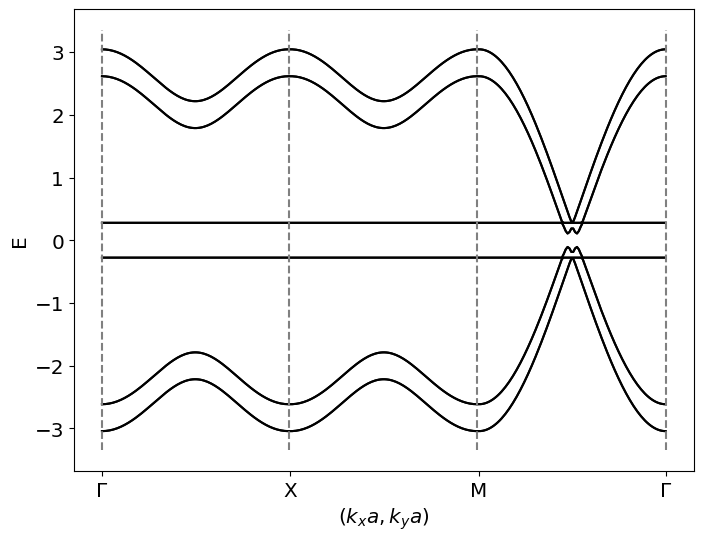

In [1126]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()

In [1106]:
mM.Hk(0,0)

array([[ 0.2       -0.j,  2.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.07891725-0.j,  0.        +0.j,  0.        +0.j],
       [ 2.        +0.j,  0.2       -0.j,  2.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.0242193 -0.j,  0.        +0.j],
       [ 0.        +0.j,  2.        +0.j,  0.2       -0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.07872415-0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.2       -0.j,  2.        +0.j,  0.        +0.j,
        -0.07891725+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.       

In [1107]:
Earr = np.linspace(-1.5,1.5,250)
DOS = mM.DOS(Earr, k, sig=0.02)
DOS[0]

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:309: RuntimeWarning: overflow encountered in square
  s1=0


nan

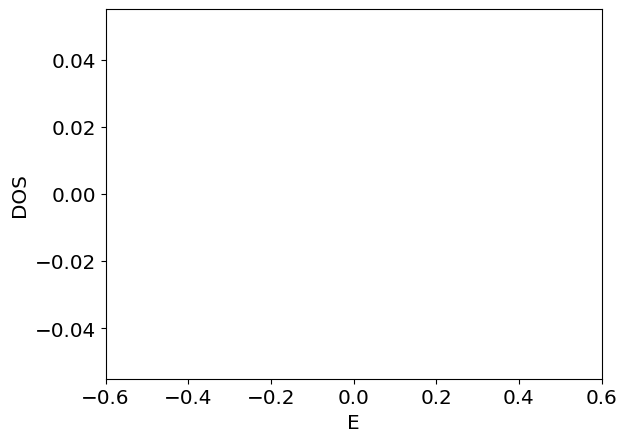

In [1108]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
plt.plot(Earr, DOS)

#plt.vlines([emax, -emax], 0, 100, colors='black')
#plt.legend()
#plt.savefig("Pictures/DOS_SC.png")
plt.show()